<a href="https://colab.research.google.com/github/Jhackelyn/Cursos-Alura/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

In [3]:
facturacion_por_tienda = todas_las_tiendas.groupby('Tienda')['Precio'].sum().reset_index()
facturacion_por_tienda.rename(columns={'Precio': 'Facturacion_Total'}, inplace=True)
display(facturacion_por_tienda)

,Tienda,Facturacion_Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [4]:
ventas_por_categoria = todas_las_tiendas.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_por_categoria.rename(columns={'Precio': 'Ventas_por_Categoria'}, inplace=True)
display(ventas_por_categoria)

,Categoría del Producto,Ventas_por_Categoria
0,Artículos para el hogar,5.757980e+07
1,Deportes y diversión,1.429777e+08
2,Electrodomésticos,1.324751e+09
3,Electrónicos,1.660576e+09
4,Instrumentos musicales,3.487726e+08
5,Juguetes,7.360440e+07
6,Libros,3.769610e+07
7,Muebles,7.576610e+08


In [5]:
categorias_por_tienda = todas_las_tiendas.groupby('Tienda')['Categoría del Producto'].unique().reset_index()
for index, row in categorias_por_tienda.iterrows():
    print(f"Tienda {row['Tienda']}: {', '.join(row['Categoría del Producto'])}")

Tienda Tienda 1: Electrónicos, Muebles, Juguetes, Electrodomésticos, Artículos para el hogar, Deportes y diversión, Libros, Instrumentos musicales
Tienda Tienda 2: Muebles, Instrumentos musicales, Deportes y diversión, Electrónicos, Artículos para el hogar, Juguetes, Electrodomésticos, Libros
Tienda Tienda 3: Electrodomésticos, Muebles, Instrumentos musicales, Deportes y diversión, Electrónicos, Juguetes, Artículos para el hogar, Libros
Tienda Tienda 4: Electrodomésticos, Muebles, Deportes y diversión, Libros, Electrónicos, Instrumentos musicales, Juguetes, Artículos para el hogar


# 3. Calificación promedio de la tienda


In [6]:
calificacion_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio_por_tienda.rename(columns={'Calificación': 'Calificacion_Promedio'}, inplace=True)
display(calificacion_promedio_por_tienda)

,Tienda,Calificacion_Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [7]:
ventas_por_producto = todas_las_tiendas.groupby('Producto')['Precio'].sum().reset_index()

productos_mas_vendidos = ventas_por_producto.sort_values(by='Precio', ascending=False).head(10)
productos_menos_vendidos = ventas_por_producto.sort_values(by='Precio', ascending=True).head(10)

print("Top 10 Productos Más Vendidos (por facturación):")
display(productos_mas_vendidos)

print("\nTop 10 Productos Menos Vendidos (por facturación):")
display(productos_menos_vendidos)

Top 10 Productos Más Vendidos (por facturación):


,Producto,Precio
48,TV LED UHD 4K,432489600.0
25,Iphone 15,401051200.0
39,Refrigerador,384937400.0
45,Smart TV,290221800.0
28,Lavadora de ropa,242468600.0
29,Lavavajillas,240536500.0
49,Tablet ABXY,219012800.0
40,Secadora de ropa,210238000.0
13,Celular ABXY,157911100.0
7,Batería,147806300.0



Top 10 Productos Menos Vendidos (por facturación):


,Producto,Precio
16,Cubo mágico 8x8,2729300.0
17,Cuerda para saltar,3068300.0
19,Dinosaurio Rex,3112900.0
0,Ajedrez de madera,5149100.0
42,Set de vasos,5584200.0
18,Dashboards con Power BI,6418400.0
9,Bloques de construcción,6802100.0
50,Vaso térmico,8497400.0
15,Cubertería,8560400.0
36,Muñeca bebé,8591500.0


# 5. Envío promedio por tienda

In [8]:
envio_promedio_por_tienda = todas_las_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()
envio_promedio_por_tienda.rename(columns={'Costo de envío': 'Envio_Promedio'}, inplace=True)
display(envio_promedio_por_tienda)

,Tienda,Envio_Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


### Envío promedio por tienda

### Categorías por tienda

In [9]:
for index, row in categorias_por_tienda.iterrows():
    print(f"Tienda {row['Tienda']}: {', '.join(row['Categoría del Producto'])}")

Tienda Tienda 1: Electrónicos, Muebles, Juguetes, Electrodomésticos, Artículos para el hogar, Deportes y diversión, Libros, Instrumentos musicales
Tienda Tienda 2: Muebles, Instrumentos musicales, Deportes y diversión, Electrónicos, Artículos para el hogar, Juguetes, Electrodomésticos, Libros
Tienda Tienda 3: Electrodomésticos, Muebles, Instrumentos musicales, Deportes y diversión, Electrónicos, Juguetes, Artículos para el hogar, Libros
Tienda Tienda 4: Electrodomésticos, Muebles, Deportes y diversión, Libros, Electrónicos, Instrumentos musicales, Juguetes, Artículos para el hogar


In [10]:
envios_por_categoria_tienda = todas_las_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad_Envios')

idx = envios_por_categoria_tienda.groupby('Tienda')['Cantidad_Envios'].idxmax()
categoria_mas_enviada_por_tienda = envios_por_categoria_tienda.loc[idx]

print("Categoría más enviada por tienda:")
display(categoria_mas_enviada_por_tienda)

Categoría más enviada por tienda:


,Tienda,Categoría del Producto,Cantidad_Envios
7,Tienda 1,Muebles,465
15,Tienda 2,Muebles,442
23,Tienda 3,Muebles,499
31,Tienda 4,Muebles,480


/tmp/ipython-input-1836665943.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ventas_por_Categoria', y='Categoría del Producto', data=top_categorias, palette='viridis')


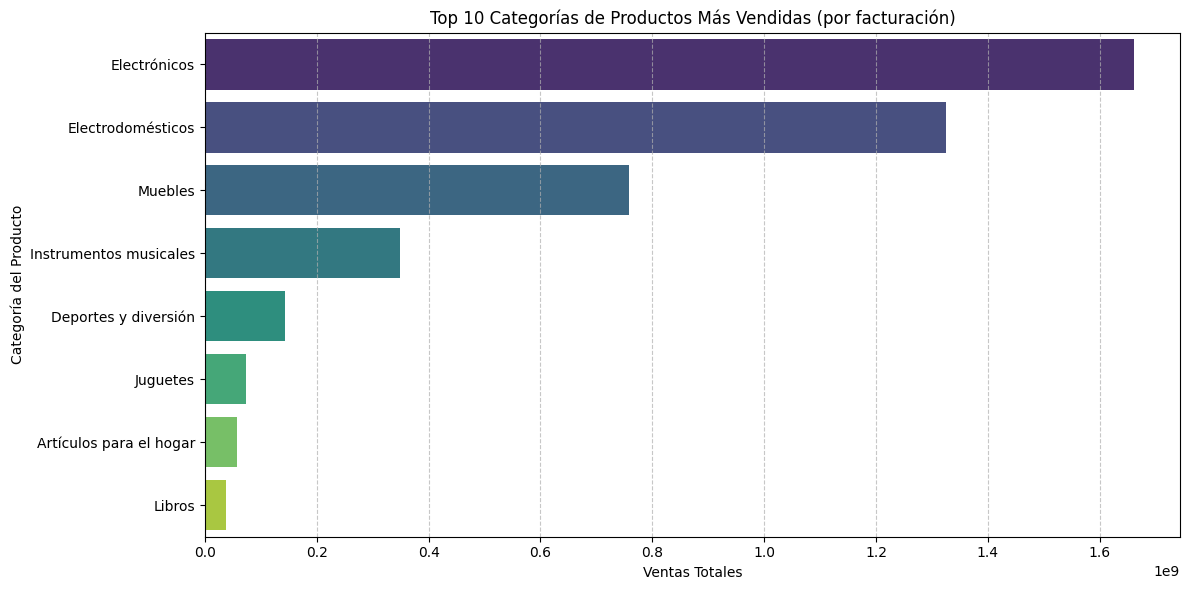

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las categorías por ventas y seleccionar las 10 principales
top_categorias = ventas_por_categoria.sort_values(by='Ventas_por_Categoria', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Ventas_por_Categoria', y='Categoría del Producto', data=top_categorias, palette='viridis')
plt.title('Top 10 Categorías de Productos Más Vendidas (por facturación)')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría del Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2895565440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Facturacion_Total', data=facturacion_ordenada, palette='coolwarm')


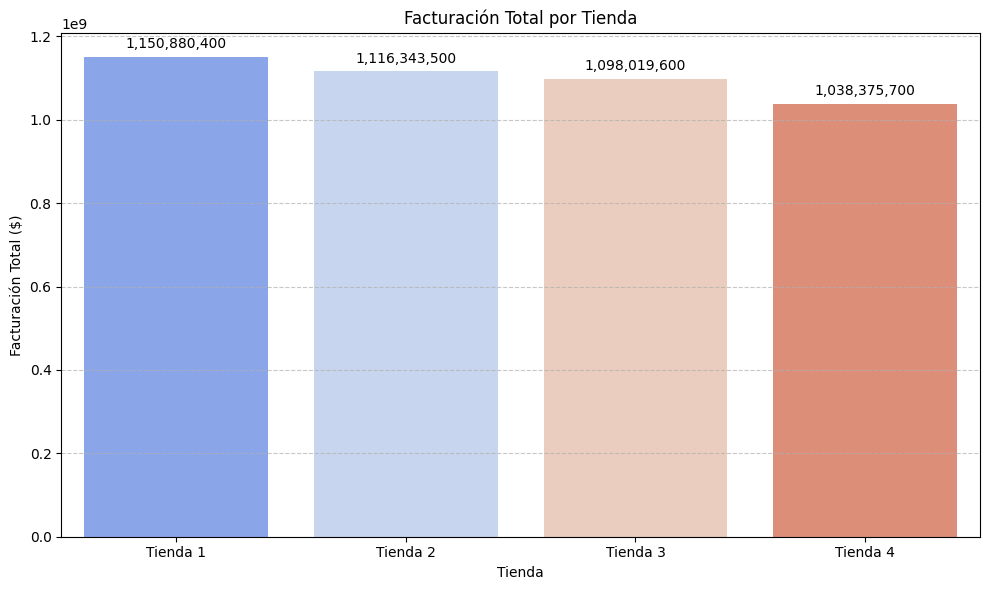

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar la facturación por tienda para visualizar fácilmente la de mejores ventas
facturacion_ordenada = facturacion_por_tienda.sort_values(by='Facturacion_Total', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Facturacion_Total', data=facturacion_ordenada, palette='coolwarm')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los valores en el centro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1657971681.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Calificacion_Promedio', data=calificacion_ordenada, palette='viridis')


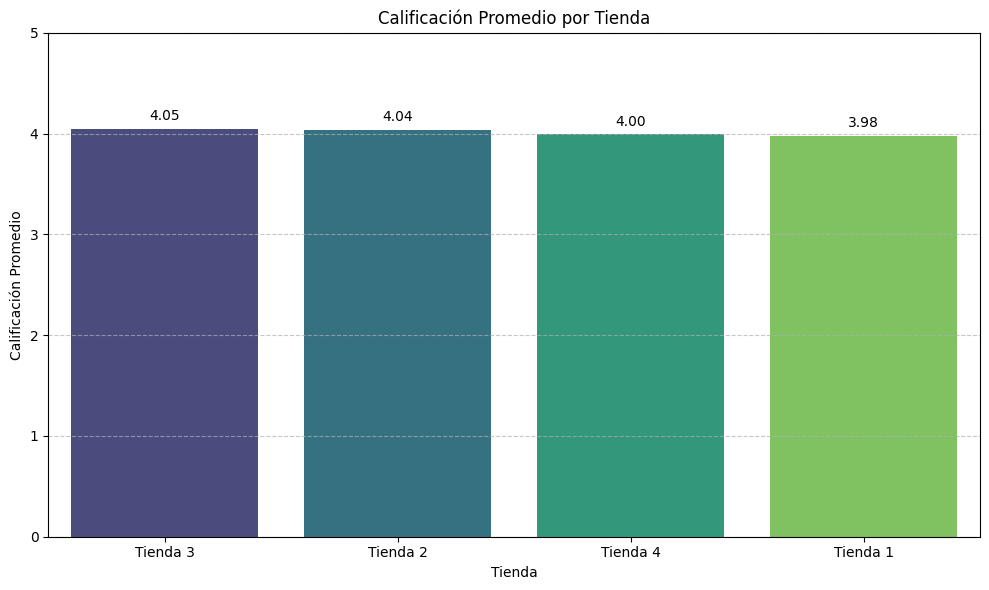

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las tiendas por calificación promedio de mayor a menor
calificacion_ordenada = calificacion_promedio_por_tienda.sort_values(by='Calificacion_Promedio', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Calificacion_Promedio', data=calificacion_ordenada, palette='viridis')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5) # Las calificaciones suelen ser de 1 a 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los valores en el centro de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

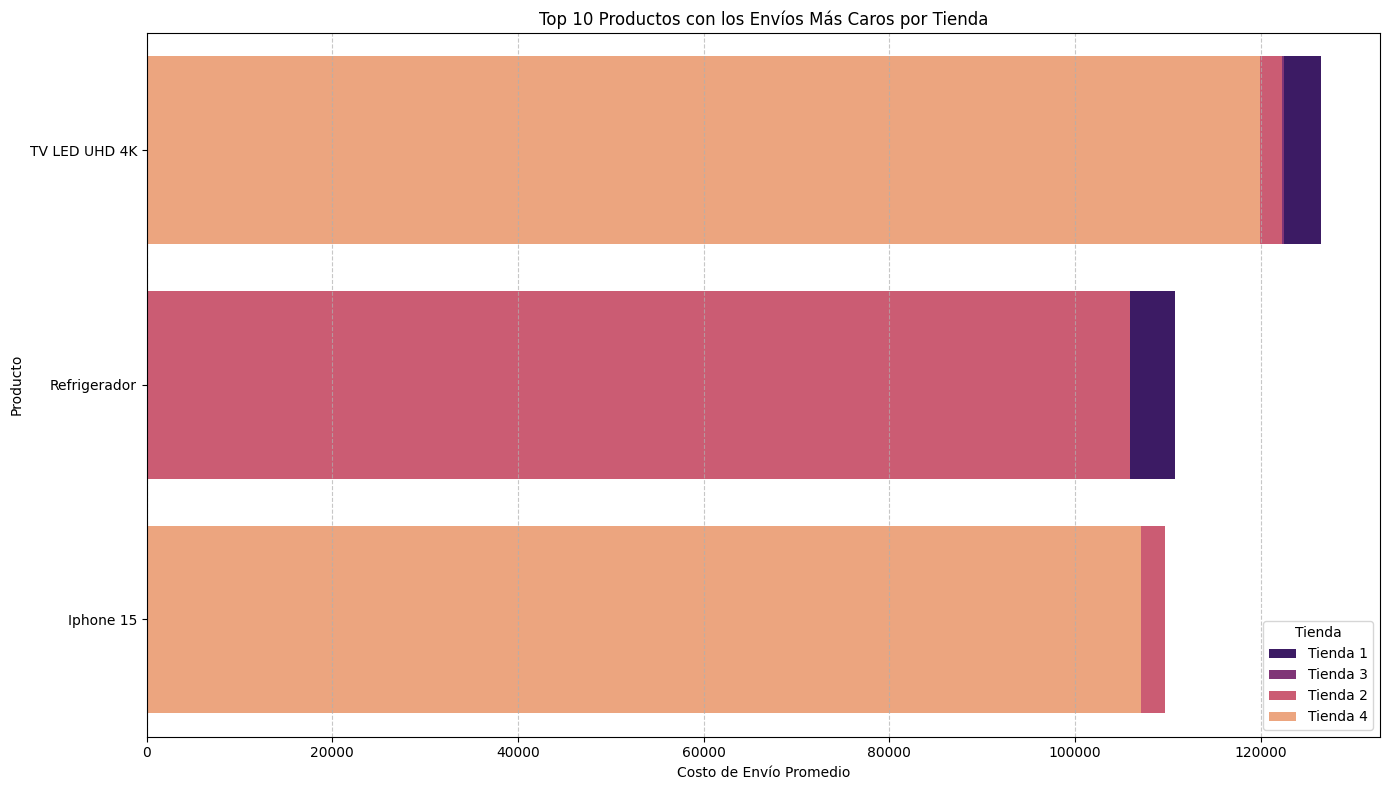

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el costo de envío promedio por producto y tienda
envio_promedio_producto_tienda = todas_las_tiendas.groupby(['Tienda', 'Producto'])['Costo de envío'].mean().reset_index()

# Obtener los 10 envíos más caros
top_10_envios_caros = envio_promedio_producto_tienda.sort_values(by='Costo de envío', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='Costo de envío', y='Producto', hue='Tienda', data=top_10_envios_caros, palette='magma', dodge=False)
plt.title('Top 10 Productos con los Envíos Más Caros por Tienda')
plt.xlabel('Costo de Envío Promedio')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()